<a href="https://colab.research.google.com/github/andersjes/Deep-Learning/blob/main/Lab3_FunWithMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fun with MNIST
Convolutional Neural Networks (CNNs) are able to solve a wide range of computer vision tasks. In this Lab you will learn about

- Image classification
- Convolutional AutoEncoders
- Denoising AutoEncoders
- Image super resolution
- Image regression
- Image segmentation
- Object detection
- Few-shot learning with Siamese networks
- Generative Adversarial Networks (GANs)

The purpose of the Lab is to give your some intuition about how to tweak CNNs to solve different tasks.

**Before we start - remember to set runtime to GPU**

##Task 1: Downloading and pre-processing the MNIST dataset
The MNIST dataset of handwritten digits is so commonly used that it comes with most deep learning frameworks, including Keras. Let's download the dataset and explore a little bit.

y_test: [7 2 1 ... 4 5 6]
y_test: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Examples of test images


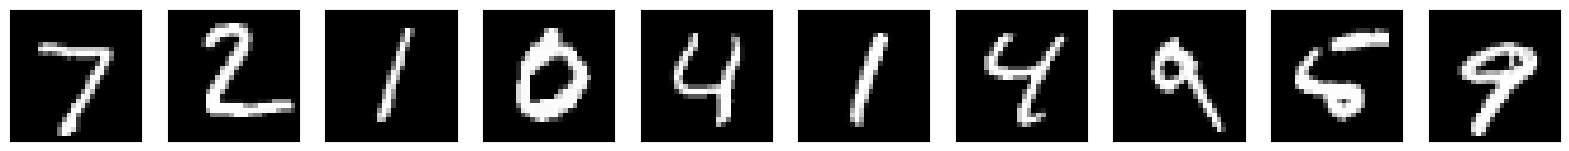

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
from __future__ import print_function
import tensorflow
from tensorflow import keras
from keras.datasets import mnist
from keras import backend as K
from matplotlib import pyplot as plt

# Utility function for showing images
def show_imgs(x_test, n=10):
    sz = x_test.shape[1]
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(sz,sz))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Pre-process inputs
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#print y_test before categorical
print('y_test:', y_test)

# Convert class indices to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#print y_test after categorical
print('y_test:', y_test)

print('Examples of test images')
show_imgs(x_test)

#print input shape
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

###Questions 1.1
1. What is the input shape?
2. How many training examples are there?
3. How many test examples are there?
4. What does `to_categorical` do? (Hint: print `y_test` before and after applying `to_categorial`)

transform vector into one-hot vectors.

##Task 2: Softmax regression
Now, let's define a tiny Keras model for logistic regression. Mathematically this model outputs a 10-dimensional vector `y` of class probabilities, where


```
y = softmax(W*x + b)
```

and
- `x` is a 28x28 = 784-dimensional vector corresponding to the input image,
- `W` is a 10 x 784 matrix of weights
- `b` is a 10-dimensional vector of biases

Defining models in Keras is not very intuitive from a mathematical perspective. Here is one way to implement the equation above using Keras' [Sequential API](https://keras.io/getting-started/sequential-model-guide/). A Sequential model is a just a linear stack of layers.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation

tensorflow.random.set_seed(0) # make weight initialization deterministic

# Model
model = Sequential()
model.add(Flatten(input_shape=input_shape)) # input_shape is (28, 28, 1)
model.add(Dense(num_classes)) # num_classes is 10
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

###Questions 2.1
1. What do you think the Flatten() layer does, and why is it necessary to have it here?

transform vector into one dimemsion
2. What do you think the Dense() layer does, and why does it have 7850 parameters?

This line adds a dense layer to the neural network. Dense layers are fully connected layers, meaning each neuron in the layer receives input from all neurons of the previous layer.

num_classes = 10 sets the number of neurons in the dense layer to 10, corresponding to the number of classes in the MNIST dataset (digits 0-9).
Each neuron in this layer will learn to output a score for one of the classes.

3. What do you think Activation() does, and why is its argument set to "softmax"?

This line adds a softmax activation function to the dense layer.

The softmax function converts the scores outputted by the dense layer into probabilities. This ensures that the sum of probabilities for all classes adds up to 1.
The output of this layer is a probability distribution over the 10 classes, representing the model's prediction of the digit in the input image.

**Tip**

To answer questions like the ones above, you could perform simple experiments like the one below:

```
input_shape = (28, 28, 1)
x = tensorflow.random.normal(input_shape)
y = keras.layers.Flatten()(x)
print(y.shape)
```

###Training

Now, let's train the model for 10 epochs. We will be using the multi-class version of the cross entropy loss and stochastic gradient descent (SGD). The difference between normal gradient descent and SGD is that normal gradient descent calculates the gradients based on all training examples, whereas SGD approximates the gradient by calculating it on small batches (of size 128 in this example).

In [5]:
batch_size = 128
epochs = 10

# Compile the model before training
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model
history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5323 - loss: 1.6618 - val_accuracy: 0.8360 - val_loss: 0.8014
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8344 - loss: 0.7605 - val_accuracy: 0.8661 - val_loss: 0.5996
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8581 - loss: 0.6021 - val_accuracy: 0.8773 - val_loss: 0.5193
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8687 - loss: 0.5323 - val_accuracy: 0.8849 - val_loss: 0.4746
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8753 - loss: 0.4915 - val_accuracy: 0.8885 - val_loss: 0.4455
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8803 - loss: 0.4640 - val_accuracy: 0.8915 - val_loss: 0.4248
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8841 - loss: 0.4440 - val_accuracy: 0.8938 - val_loss: 0.4091
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8870 - loss: 0.4285 - val_accuracy: 0.

In machine learning it is always a good idea to pick a simple **baseline model** that you can compare your own models to. We will refer to the classifier above as our baseline. You should expect the validation accuracy of our baseline model to be around 90% after training for 10 epochs.

###Model evaluation
For several reasons you always want to monitor how your model performs during training. The simplest way to monitor the training process is by plotting the loss and accuracy curves. Here we are doing it post-training, but there are tools that allow you to monitor the curves in real-time (see for instance [TensorBoard](https://www.tensorflow.org/tensorboard)).

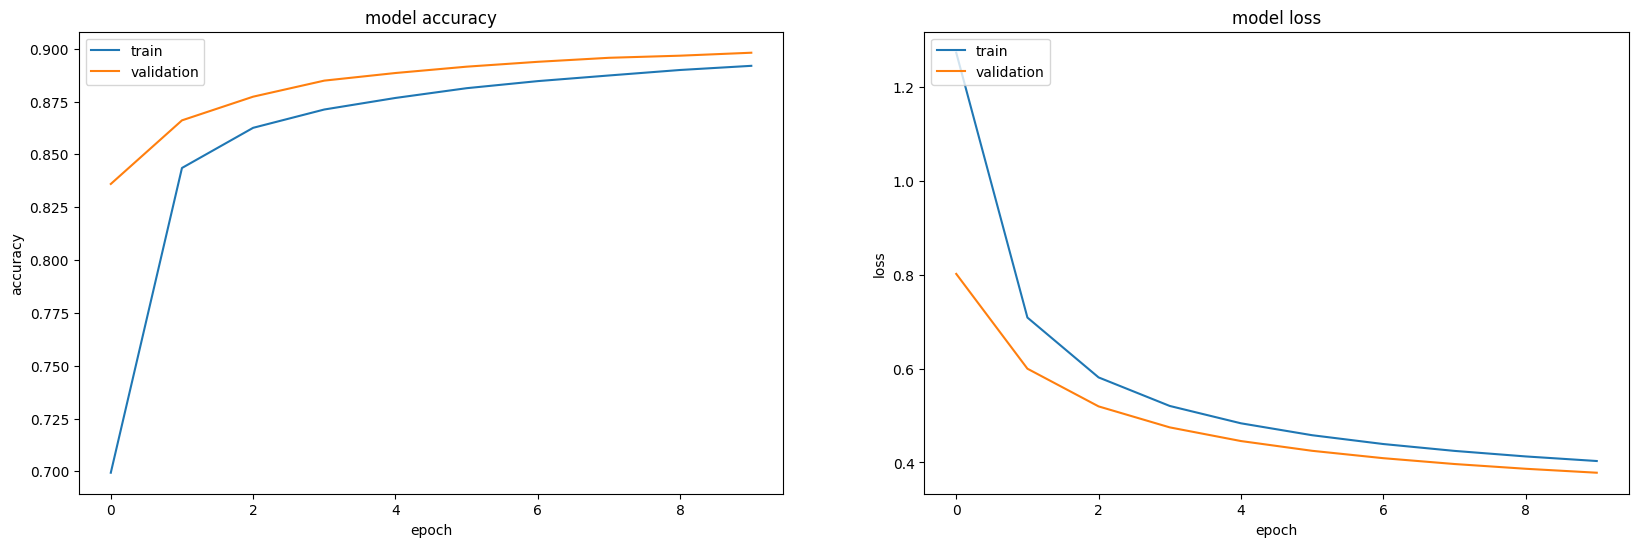

In [6]:
import matplotlib.pyplot as plt

def show_history(history):
  plt.figure(figsize=(20,6))

  # summarize history for accuracy
  plt.subplot(121)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')

  # summarize history for loss
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

show_history(history)

Examples of things you should be looking for:

- The loss should go down over time.
 - If it increases, it usually means that your learning rate was set too high.
 - If it doesn't decrease, it could indicate that your learning rate was set too low.
- If the validation loss starts increasing, while the training loss is still decreasing, it means that your model has started overfitting.
 - Can you explain why?

 The model memorizes instead of getting trained
- Simply stated, your model is done training when the loss curves hit a low plateau.
 - Are we done training in the above example, or do you think we should we be training for more epochs?

 I need more Epochs.


###Task 2.1: Batch size and number of epochs
Training on the entire MNIST training data set is guaranteed to work (almost) always. Simply because of the large number of images in the training set. This is boring. So let's make our problem a little more challenging by reducing the number of training examples to just 10 samples from each class.

In [7]:
import numpy as np

np.random.seed(0) # make it deterministic

# create smaller training set
digit_indices = np.asarray([np.where(np.argmax(y_train,axis=1) == i)[0][np.random.randint(0,5000,10)] for i in range(num_classes)]).flatten()
x_train_small = x_train[digit_indices,:]
y_train_small = y_train[digit_indices,:]

**Note:** Set verbose=1 to print output while training.

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.0555 - loss: 2.3097 - val_accuracy: 0.2391 - val_loss: 2.1084
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.3337 - loss: 2.0323 - val_accuracy: 0.4545 - val_loss: 1.9325
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.5579 - loss: 1.7984 - val_accuracy: 0.5591 - val_loss: 1.7862
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.7214 - loss: 1.5996 - val_accuracy: 0.6125 - val_loss: 1.6637
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.7836 - loss: 1.4317 - val_accuracy: 0.6435 - val_loss: 1.5612
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.8200 - loss: 1.2903 - val_accuracy: 0.6690 - val_loss: 1.4750
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.9015 - loss: 1.1709 - val_accuracy: 0.6852 - val_loss: 1.4022
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9188 - loss: 1.0697 - val_accuracy: 0.

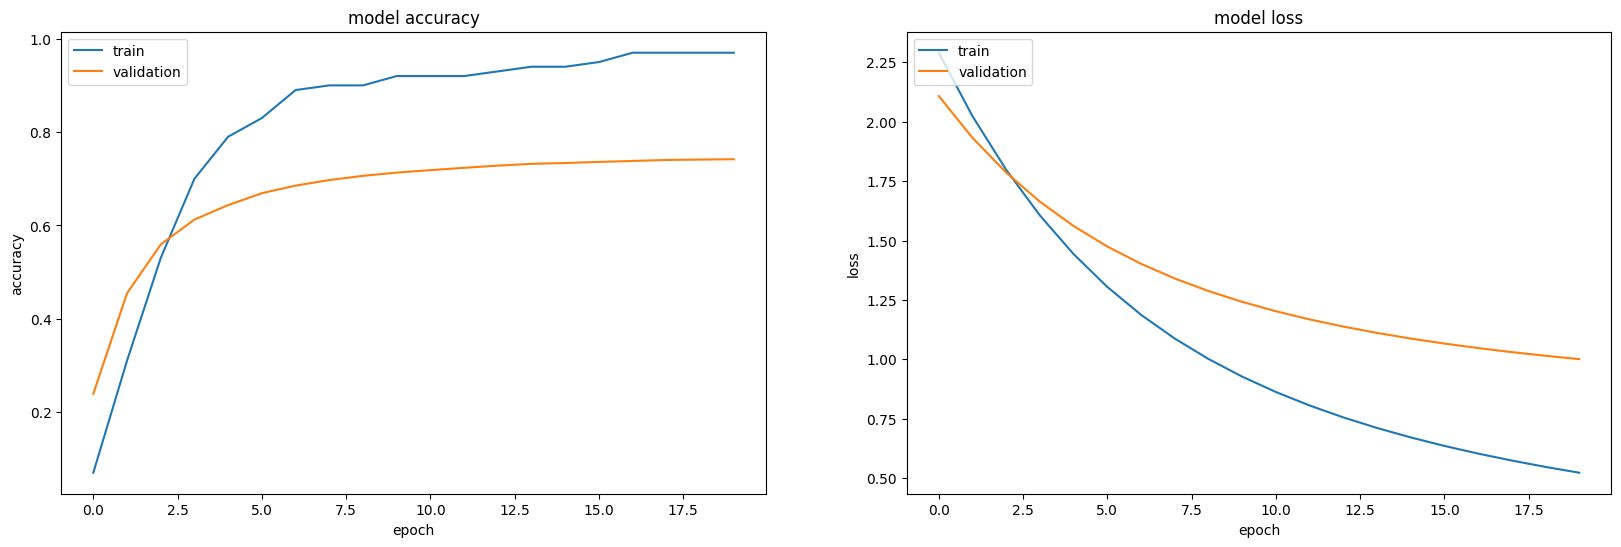

In [8]:
import time

batch_size = 5 # Cannot use 128 like before, because we only have 100 samples (10 from each class)
epochs = 20 # We need more epochs because we have fewer training samples

tensorflow.random.set_seed(0)

# Model (redefine the model in order to reinitialize the weights to random values)
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model before training
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model (this will take a little while. Set verbose to 1 if you want to see how training progresses)
start_time = time.time()
history = model.fit(x_train_small, y_train_small,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            verbose=1,
            shuffle=True)
print("--- training tool %s seconds ---" % (time.time() - start_time))

score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

# Plot old vs new loss
show_history(history)

**Note:** Although we didn't change the underlying equation of our baseline model (`y = softmax(Wx+b)`), we did change the nature of the data on which the model was trained, and we also lowered the batch size and increased the number of epochs. So this is considered a **new model** that we could compare to our baseline model.

###Question 2.2
1. Our new model performs worse than the baseline model. Why?

we have less data in our training set.
2. This puzzle is supposed to make you speculate. You are not required to get the answers right at this stage of the course. Temporarily set the number of epochs to 10 to make experimentation faster. How does training behave when we set the batch size to the values listed below? Compare the loss curves and the training times and see if you can figure out why they differ the way they do. Use these batch sizes:
 - 1 (lowest possible)
 - 5 (low)
 - 20 (medium)
 - 100 (highest possible)
3. Above, we changed the batch size and the number of epochs. Are these *hyperparameters* or *learnable parameters*? Btw., what are the learnable parameters of our model (``y = softmax(W*x + b)``)?

Batch size and the number of epochs are hyperparameters.

Hyperparameters are parameters that are set before training and are not learned by the model during training. They control the learning process itself.

Learnable parameters are the parameters that are learned by the model during training. In the case of the softmax regression model (y = softmax(W*x + b)), the learnable parameters are:

W: The weights of the connections between the input layer and the output layer.
b: The biases of the neurons in the output layer.
4. Which criteria would you pick to determine the "optimal" combination of batch size and number of epochs?

###Task 2.2: Finding a better learning rate
The learning rate is another hyperparameter that we can tweak.

Training with the default learning rate (which is 0.01) is rather slow. Your task is to find a better learning rate that makes the model converge faster, without comprimising the model's accuracy on the validation set. With a proper learning rate you should be able to achieve 74-75% accuracy in just 10 epochs (instead of 20 as above).

You can adjust the learning rate by setting the `learning_rate` argument of keras.optimizer.SGD:

```
keras.optimizers.SGD(learning_rate=0.01)
```

**Optional bonus questions:** What happens if you set the learning rate way too low (e.g. 0.0001)?


###Task 2.3: Displaying the learned weights
In the case of softmax regression there is a very intuitive interpretation of the learned weights of the coefficient matrix `W`, as you will see below.

First, your task is to extract the weights of the coefficient matrix from the model (i.e. the `Dense` layer) and display each row as an image.

(784, 10)


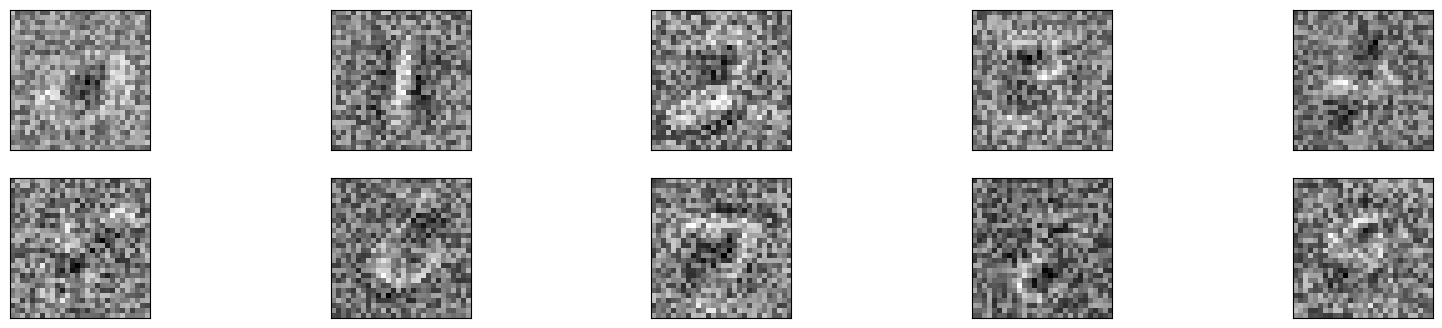

In [13]:

#extract the weights of the coefficient matrix from the model (i.e. the Dense layer) and display each row as an image.
W = model.layers[1].get_weights()[0] # This line of code extracts the weights of the Dense layer, which is the second layer (index 1) in your sequential model.
print(W.shape)
W = W.reshape((28,28,10)) # there are 10 classes and one 28x28 weight image per class
plt.figure(figsize=(20,4))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  plt.imshow(W[:,:,i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.gray()

### Questions 2.3
1. How do we interpret the weights?
2. In some regions the weights are very noisy. What could be the consequences of that?

Overfitting: The model may learn to fit the noise in the training data, leading to poor generalization to new, unseen data.
Reduced interpretability: The noise can make it harder to understand the learned features and relationships captured by the model.
Increased complexity: Noisy weights can make the model more complex and prone to instability.
Slower training: The model may take longer to converge during training.

###Task 2.4: Weight decay (or L2 regularization)
With only 10 observations per class in our training data set, it is very likely that our model overfits the training data. This leads to poor generalization (i.e., the model doesn't work that well on unseen data).

One way to address overfitting is by means of regularization. The best kind of regularization is "adding more data" (of course). This is the reason that our baseline model performs better than the current model.

One possible regularization strategy is to use *weight decay*. So let's modify the loss function of the model by adding an L2 regularization term. The regularization term is added using an extra parameter to the Dense layer.

Please note that the weight of the penalty term (`lamda`) has been set rather high in the example below. As a consequence, you will actually see a small decrease in validation accuracy. But as you will see later, weight decay has dramatic effect on the learned weights (`W`). By the way, `lambda` is yet another hyperparameter that we could tweak to make our model perform better.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation loss: 1.6376782655715942
Validation accuracy: 0.714900016784668
Loss curves with regularization


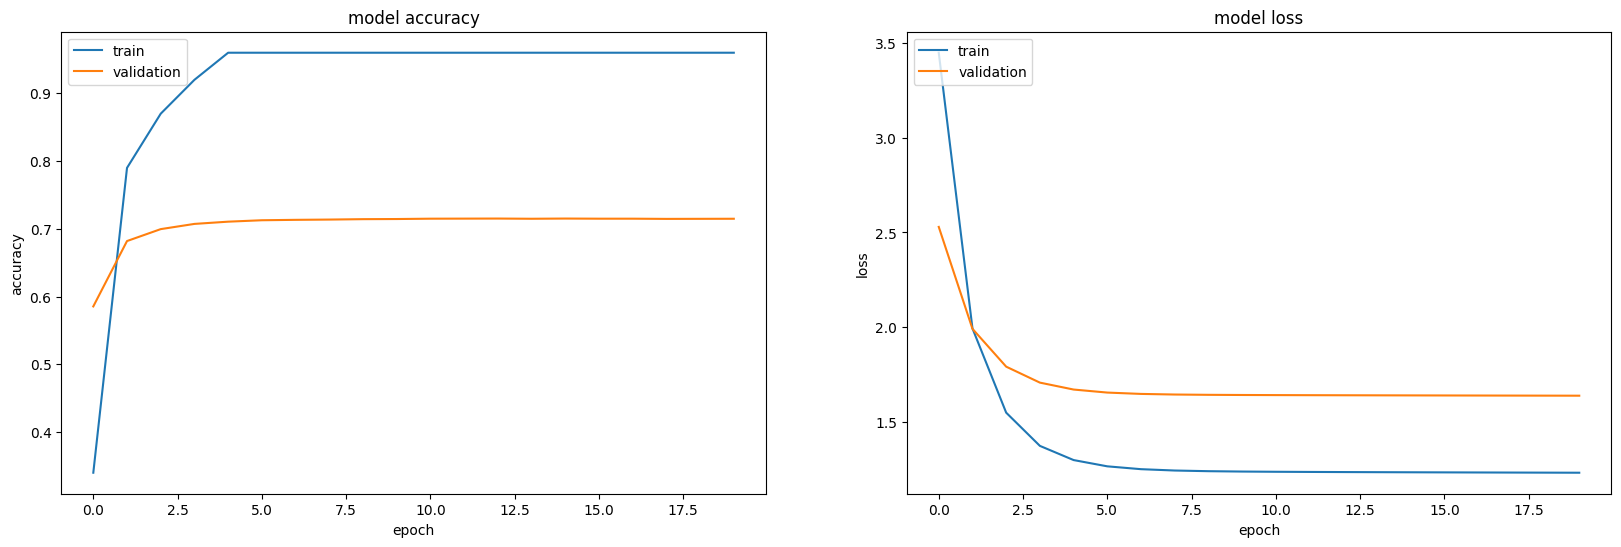

In [14]:
batch_size = 5
epochs = 20

tensorflow.random.set_seed(0)

# lamda is the weight of the L2 penalty term
lamda = 0.1
L2_regularizer = keras.regularizers.l2(lamda)

# Model
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes,
                activation='softmax',
                kernel_regularizer=L2_regularizer))

# Training
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),loss='categorical_crossentropy',metrics=['accuracy'])
history_reg = model.fit(x_train_small, y_train_small,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(x_test, y_test))

# Evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

# Plot loss
print("Loss curves with regularization")
show_history(history_reg)

**Now comes the interesting part:** Try once more to display the weights - this time of the regularized model.

(784, 10)


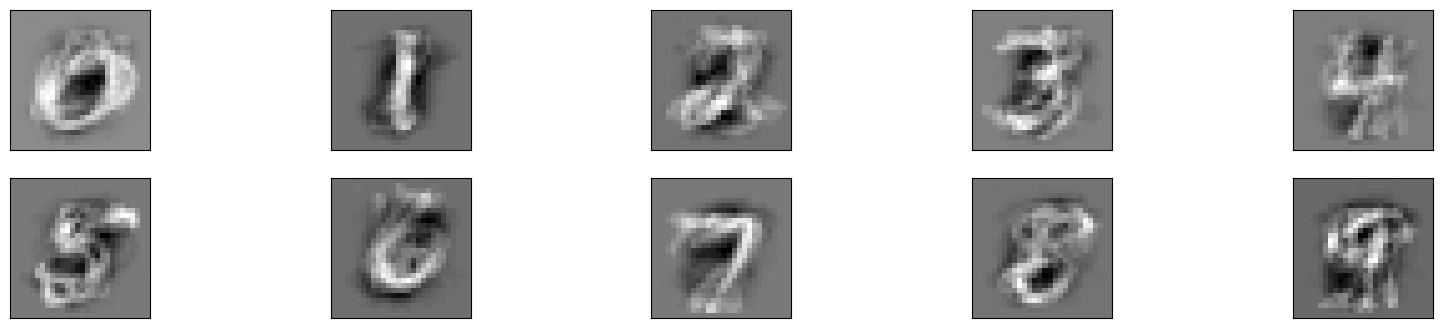

In [16]:
W = model.layers[1].get_weights()[0] # This line of code extracts the weights of the Dense layer, which is the second layer (index 1) in your sequential model.
print(W.shape)
W = W.reshape((28,28,10))
plt.figure(figsize=(20,4))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  plt.imshow(W[:,:,i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.gray()

###Questions 2.4
1. How do the weights of the regularized model differ from the weights of the non-regularized model?
2. Can you explain why?

Utillize L1 makes the model to learn simpler instead of overfitting.

###Functional API instead of Sequential API
The models above have been specified using Keras' [Sequential API](https://keras.io/getting-started/sequential-model-guide/). Keras also allows you to specify models using the [Functional API](https://keras.io/getting-started/functional-api-guide/). The Keras functional API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

Here is how to set up the (baseline) softmax regression model using the functional API:

In [17]:
from keras.layers import Input
from keras.models import Model

tensorflow.random.set_seed(0)

# This returns a tensor
inputs = Input(shape=input_shape)

# A layer instance is callable on a tensor, and returns a tensor
x = Flatten()(inputs)
x = Dense(num_classes)(x)
predictions = Activation('softmax')(x)

# This creates a model that includes the Input layer and the prediction layer
model = Model(inputs=inputs, outputs=predictions)

# Training
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5487 - loss: 1.6490 - val_accuracy: 0.8334 - val_loss: 0.8033
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8343 - loss: 0.7623 - val_accuracy: 0.8642 - val_loss: 0.6022
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8552 - loss: 0.6046 - val_accuracy: 0.8754 - val_loss: 0.5218
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8674 - loss: 0.5348 - val_accuracy: 0.8825 - val_loss: 0.4767
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8737 - loss: 0.4937 - val_accuracy: 0.8862 - val_loss: 0.4473
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8794 - loss: 0.4661 - val_accuracy: 0.8901 - val_loss: 0.4262
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8833 - loss: 0.4459 - val_accuracy: 0.8924 - val_loss: 0.4102
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8863 - loss: 0.4304 - val_accuracy: 0.

##Task 3: Our first CNN
It's time to move on and build our first CNN.

Here is a simple example:

In [18]:
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input
from keras.models import Model

tensorflow.random.set_seed(0)

inputs = Input(shape=(28, 28, 1))

# Encoder (convolutional base)
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
encoded = Flatten()(x)

# Decoder (2 fully connected layers)
x = Dense(units=64, activation='relu')(encoded)
x = Dropout(rate=0.5)(x)
predictions = Dense(units=num_classes,activation='softmax')(x)

# This creates a callable model that includes the Input layer and the prediction layer
model = Model(inputs=inputs, outputs=predictions)

model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,034 (97.79 KB)

 Trainable params: 25,034 (97.79 KB)

 Non-trainable params: 0 (0.00 B)

###Questions 3.1
1. How many layers does this CNN have?
10
2. How many convolution filters are there in the first convolution layer, and what is the width and height of the filters?

5 CNN layers - 2 maxpooling and 3 conv2d layers. goes from 26,26,8 to 3,3,32.
3. What does the MaxPooling2D layer do?

Reduces the spatial dimensions of the input data (e.g., height and width of an image). This helps to reduce the number of parameters and computation in the network, and can also make the model more robust to variations in the input.

Operates on small regions of the input called pooling windows (e.g., 2x2 pixels). For each pooling window, it selects the maximum value and discards the rest. This helps to retain the most important features while discarding less important details.
4. What does the Dropout layer do?

Randomly drops out neurons (sets their output to zero) during training. The probability of dropping a neuron is controlled by the rate parameter (e.g., rate=0.5 means each neuron has a 50% chance of being dropped).

Forces the network to learn more robust features by preventing co-adaptation of neurons. This means that the network cannot rely too much on any single neuron, and instead has to learn redundant representations.

Improves generalization by making the model less sensitive to the specific training data.
5. What is the shape of the input of the last convolution layer (i.e., just before the flatten layer)

3,3,32

**Recall**

You can make small experiments like this one

```
input_shape = (1, 28, 28, 1) # Dimensions are (batch_size, height, width, num_channels)
x = tensorflow.random.normal(input_shape)
y = keras.layers.Conv2D(filters=2, kernel_size=3, activation='relu', padding="same", input_shape=input_shape[1:])(x)
print(y.shape)
```

**Optional bonus task:** See if you can figure out a way to display the filters of the first convolution layer as images.

For the record, the same model can also be defined using the sequential API:


```
from keras.layers import Dropout
from keras.layers import Conv2D ![alt text](https://), MaxPooling2D

input_img = Input(shape=(28, 28, 1))
model = Sequential()
model.add(Conv2D(8,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(Flatten())
model.add(Dense(64,
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
```



###Training
Let's train our model on the small dataset and evaluate it on the validation set:

In [19]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_small, y_train_small,
                    batch_size=10,
                    epochs=30,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Valdiation accuracy:', score[1])

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.0787 - loss: 2.3268 - val_accuracy: 0.0594 - val_loss: 2.2983
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.1351 - loss: 2.2887 - val_accuracy: 0.1929 - val_loss: 2.2830
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.1381 - loss: 2.2801 - val_accuracy: 0.3334 - val_loss: 2.2656
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step - accuracy: 0.2269 - loss: 2.2532 - val_accuracy: 0.2397 - val_loss: 2.2337
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.2716 - loss: 2.1982 - val_accuracy: 0.4796 - val_loss: 2.1295
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.2241 - loss: 2.1316 - val_accuracy: 0.5100 - val_loss: 1.9181
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.4451 - loss: 1.8318 - val_accuracy: 0.5594 - val_loss: 1.5803
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.5711 - loss: 1.5154 - val_accuracy: 0.

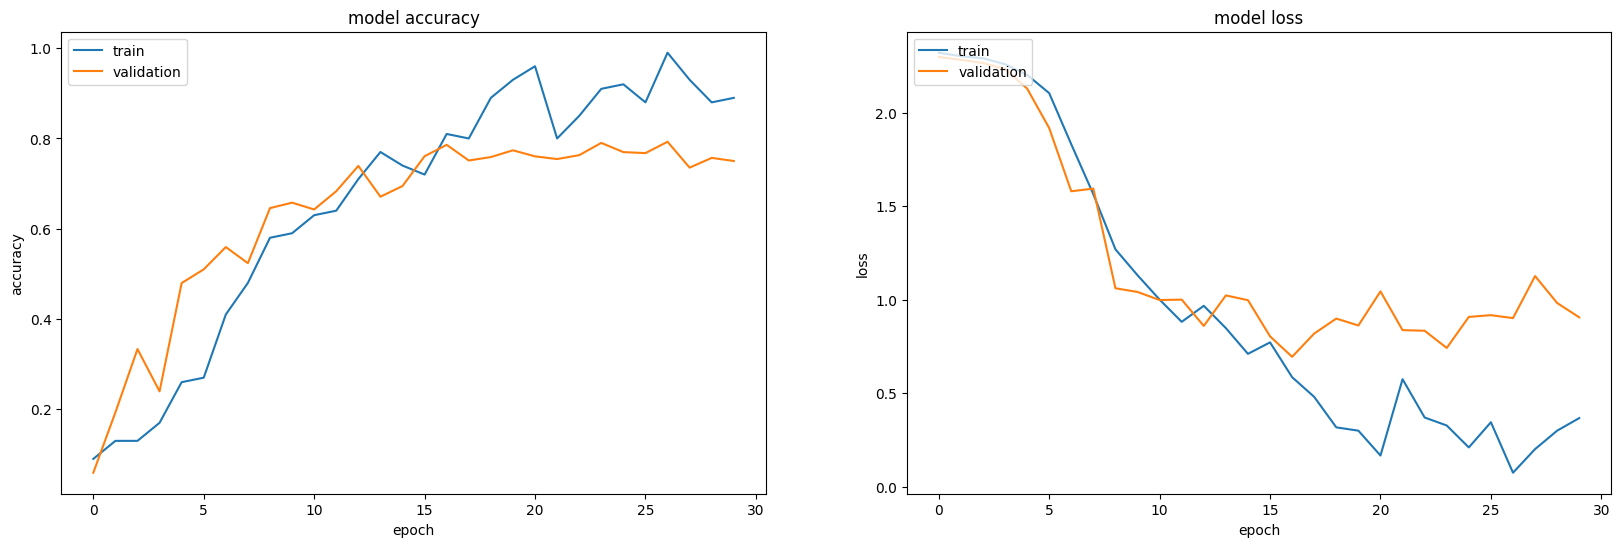

In [20]:
show_history(history)

Notice how this model is able to achieve a higher validation accuracy on the small training dataset (before we got 74.4%, now we have 80%). It does come at an expense, however; the CNN model needs to train for longer, having to do with the fact that it has more layers and more learnable parameters.

**Note:** If you train the above CNN model on the full MNIST dataset, you can expect to get at least 97-98% validation accuracy. That is quite an improvement over our baseline model (softmax regression), which got 89%.

###Task 3.1 Encoding the MNIST dataset in 2 dimensions with a CNN
In the above model the input shape to the Flatten layer  is 3x3x32, which is then flattened to a 288-dimensional vector, corresponding to the variable named `encoded`.

Your task is to modify the network such that variable `encoded` has dimensionality 2 instead of 288.

*Hint:* You could insert an extra layer before the Flatten layer that reduces the 3x3x32 input tensor to a 1x1x2 tensor. There are several solutions. It might be a good idea to add an activation function to the layer that you add. I used `activation='tanh'`. I will explain in the solution why this is a good idea.

In [21]:
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D

tensorflow.random.set_seed(0)

inputs = Input(shape=(28, 28, 1))

# Encoder (convolutional base)
x = Conv2D(8, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
#create a 1x1x2 tensor layer
x = Conv2D(2, kernel_size=(3, 3), activation='tanh')(x)
encoded = Flatten()(x)

# Decoder (2 fully connected layers)
x = Dense(64, activation='relu')(encoded)
x = Dropout(0.5)(x)
predictions = Dense(num_classes,activation='softmax')(x)

# This creates a callable model that includes the Input layer and the prediction layer
model = Model(inputs=inputs, outputs=predictions)

model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 1, 1, 2)             │             578 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,308 (28.55 KB)

 Trainable params: 7,308 (28.55 KB)

 Non-trainable params: 0 (0.00 B)

###Training
This time we train the model on the full dataset, because compressing the images to 2 dimensions is a difficult task that requires more training data.

In [24]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

#run all examples of x_test through model
out = model.predict(x_test)
print(out.shape)

model.fit(x_train, y_train,
          batch_size=100,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)
Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9605 - loss: 0.1789 - val_accuracy: 0.9694 - val_loss: 0.1462
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9619 - loss: 0.1714 - val_accuracy: 0.9673 - val_loss: 0.1451
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9616 - loss: 0.1760 - val_accuracy: 0.9509 - val_loss: 0.2236
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9613 - loss: 0.1726 - val_accuracy: 0.9675 - val_loss: 0.1533
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9631 - loss: 0.1724 - val_accuracy: 0.9701 - val_loss: 0.1452
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9652 - loss: 0.1552 - val_accuracy: 0.9651 - val_loss: 0.1711
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9670 - loss: 0.1540 - val_accuracy: 0.9653 - val_loss: 0.1604
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

###Task 3.2
Run all test examples (`x_test`) through your model and for each example extract the 2-dimensional vector output of the Flatten layer (variable named `encoded`). To make predictions on a batch of images, you can do like this: ``out = model_encoded.predict(batch)``.

Then plot those vectors in a 2D plot, where each class gets its own color.

You might find this code useful:

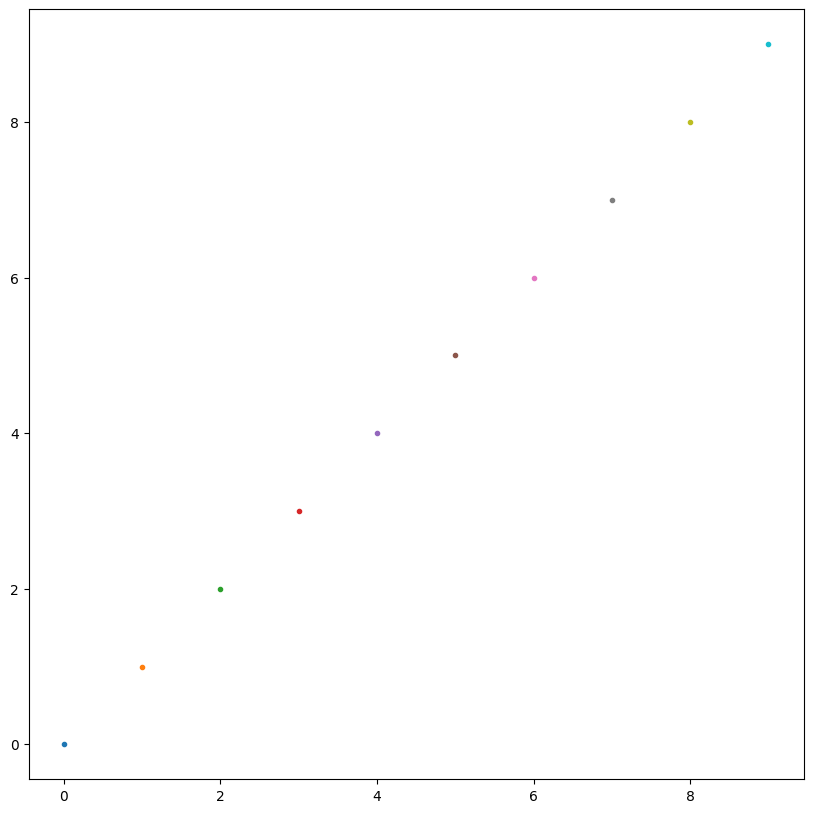

In [25]:
model_encoded = Model(inputs=model.input, outputs=encoded)

#plot vectors in a 2d plot where each class gets its own color
for i in range(10):
  plt.plot(i,i,'.C'+str(i))

###Comment
The point of this little exercise is really to illustrate the power of CNNs as image encoders. Think of what we have just accompplished: We have embedded 28x28=784 dimensional images/vectors down to just 2 dimensions, and we can still distinguish the 10 classes from each other! This is a really powerful concept for visualizing high-dimensional data in 2D.

##Task 4: Convolutional Autoencoder
Autoencoders are special types of neural networks that map the input X to the same output (namely X). So the autoencoder (AE) is an identity function:

```
X = AE(X)
```

So what's the point? The point is that the autoencoder compresses the image down to a low-dimensional representation, which can be decoded again to reconstruct the original input image. This has many useful applications, such as data compression and representation learning. Only the important information is stored in the low-dimensional representation.

The autoencoder consists of a trained encoder (E) and a trained decoder (D):

```
X = AE(X) = D(E(X))
```

It is typically (but not always) the encoding E(X) that we are interested in.

Note that the autoecoder does not need the class labels to train. So it is an **unsupervised** machine learning technique.

Here is an example of a convolutional autoencoder:

In [27]:
from keras.layers import UpSampling2D

tensorflow.random.set_seed(0)
inputs = Input(shape=(28, 28, 1))

# Encoder (convolutional base)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
print(("shape of encoded", K.int_shape(encoded)))

# Decoder (upsamling)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, kernel_size=(5, 5), padding='valid')(x)
print(("shape of decoded", K.int_shape(decoded)))

autoencoder = Model(inputs, decoded)
autoencoder.summary()

AttributeError: module 'keras.api.backend' has no attribute 'int_shape'

###Questions 4.1
1. What is the shape of the encoded image?
2. Why are we not flattening (i.e., vectorizing) the encoded image like we did in the CNN classifier above?
3. What does UpSampling2D do?
4. Why do you think upsampling is followed by a convolution? Hint: It has to do with the way we are upsampling...
5. See if you can figure out what `padding` means. What is the difference between using `padding='same'` and `padding='valid'`?

**Again** remember that you can carry out small experiments to get the answers.

###Training
Let's train the autoencoder:

In [28]:
autoencoder.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=100,
               shuffle=True, validation_data=(x_test, x_test), verbose=1)

NameError: name 'autoencoder' is not defined

And show some test results

In [29]:
decoded_imgs = autoencoder.predict(x_test)
print("input (upper row)")
show_imgs(x_test)
print("decoded (bottom row)")
show_imgs(decoded_imgs)

NameError: name 'autoencoder' is not defined

###Improving the autoencoder
This is okay, but not great. Let's use binary cross entropy (BCE) loss instead of mean squared error (MSE) loss. Using BCE assumes that the inputs are a probabilities, hence the sigmoid below to squash the values in between 0 and 1.

In [ ]:
decoded_sigmoid = Activation('sigmoid')(decoded) # decoded is the output of the first autoencoder
autoencoder2 = Model(inputs, decoded_sigmoid)
autoencoder2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy')
autoencoder2.fit(x_train, x_train, epochs=10, batch_size=100,
               shuffle=True, validation_data=(x_test, x_test), verbose=1)

In [ ]:
decoded_imgs = autoencoder2.predict(x_test)
print("input (upper row)")
show_imgs(x_test)
print("decoded (bottom row)")
show_imgs(decoded_imgs)

###Questions 4.2
1. What is the difference between 'mse' loss and 'binary_crossentropy' loss?
2. Can you explain why 'binary_crossentropy' works better?

##Task 5: Denoising Autoencoder
Autoencoders can get really advanced, like [Variational Autoencoders](https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf). A slightly less complicated, yet powerful autoecoder variant is the [Denoising Autoencoder](https://www.cs.toronto.edu/~larocheh/publications/icml-2008-denoising-autoencoders.pdf).

As stated above autoencoders have many useful applications. One of these is *noise reduction*. The underlying idea is very simple: Add random noise to the input X, and teach the autoencoder to remove the noise. That is, the autoencoder should learn the mapping:

```
X = AE(X + noise)
```

###Task 5.1
Create two new data sets based on x_train and x_test, where you have added noise such that

```
x_train_noisy = x_train + noise
x_test_noisy = x_test + noise
```

You may want to look at numpy functions like [np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) and [np.clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html).

**Your tasks:**

1. Does ``autoencoder2`` work on the noisy images, ``x_test_noisy``? (test it!)
2. Retrain ``autoencoder2`` on the noisy images (input = ``x_train_noisy`` and output = ``x_train``). What do you observe?

How much noise can you add before the autoencoder breaks down (fails to remove the noise)?

In [ ]:
#Your code goes here
#x_train_noisy = ???
#x_test_noisy = ???

Let's first verify that the existing autoencoder doesn't work well on noisy input images:

In [ ]:
# denoising
print("denoising")
decoded_imgs = autoencoder2.predict(x_test_noisy)
print("input (upper row)")
show_imgs(x_test_noisy)
print("decoded (bottom row)")
show_imgs(decoded_imgs)

Doesn't look that good. Let's see if we can teach the model to remove the noise by showing it training images that contain noise. Instead of training from scratch, we will *fine-tune* the model that has already been trained:

In [ ]:
# it takes more epochs to converge
autoencoder2.fit(x_train_noisy, x_train, epochs=10, batch_size=100,
                shuffle=True, validation_data=(x_test_noisy, x_test))

In [ ]:
# denoising
print("denoising")
decoded_imgs = autoencoder2.predict(x_test_noisy)
print("input (upper row)")
show_imgs(x_test_noisy)
print("decoded (bottom row)")
show_imgs(decoded_imgs)

Pretty cool, right?

Of cause the updated autoencoder still works on the noise-free images:

In [ ]:
# what if we feed the original noise-free test images?
decoded_imgs = autoencoder2.predict(x_test)
print("\nof course, it works with original noise-less images")
print("input (upper row)")
show_imgs(x_test)
print("decoded (bottom row)")
show_imgs(decoded_imgs)

##Task 6: Super resolution
The convolutional autoencoder is a network that maps an image to another image. There are other types of these *image-to-image networks*.

One example is a super resolution network. This is pretty much an autoencoder, except that the input image has lower spatial resolution than the output image. Super resolution networks learn to increase the spatial of the input image.

Your task is to modify the autoencoder such that it takes an 14x14x1 image as input and transforms it to a 28x28x1 image. Specifically, the training and test inputs should be



Input low resolution images


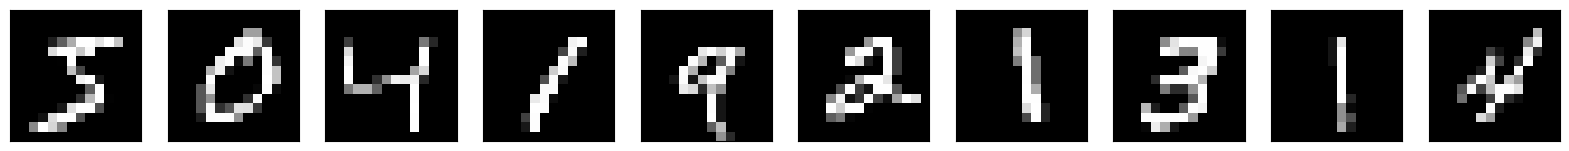

Output high resolution images (target)


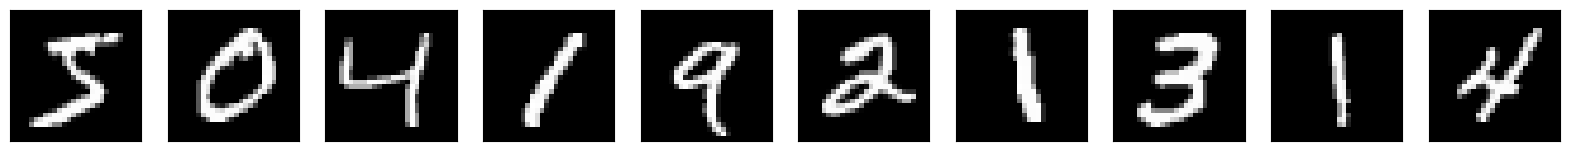

In [30]:
# Low resolution images (pick every other pixel)
x_train_lowres = x_train[:,::2,::2,:] # 14x14x1
x_test_lowres = x_test[:,::2,::2,:] # 14x14x1

# Show example
print("Input low resolution images")
show_imgs(x_train_lowres)
print("Output high resolution images (target)")
show_imgs(x_train)

##Task 7: Image regression
Recall that in a regression problems the output of the model is one or more scalar values, rather than class labels. Both the autoencoder and super resolution network are examples of regression models. Another example of image regression is [facial landmark prediction](https://medium.com/@rishiswethan.c.r/emotion-detection-using-facial-landmarks-and-deep-learning-b7f54fe551bf), which can be used for emotion recognition.

In this task we will estimate the rotation angle of rotated MNIST images (but it could just as well have been estimating pixel coordinates of facial landmarks).

As a first step, we need an image generator that generates batches of randomly rotated images, along with the target rotation angles that the model should learn to predict. This code was modified from https://d4nst.github.io/2017/01/12/image-orientation/

**Optional bonus task:** Writing your own custom data generators is a common task in deep learning. Once you have completed the main task, consider going through the code of  `RotNetDataGenerator` and see if you can figure out how it works (notice that its base class is [`keras.preprocessing.image.Iterator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/Iterator)).

In [31]:
from keras.preprocessing.image import Iterator
from keras.utils.np_utils import to_categorical
import cv2

class RotNetDataGenerator(Iterator):

    def __init__(self, input, batch_size=64,
                 preprocess_func=None, shuffle=False):

        self.images = input
        self.batch_size = batch_size
        self.input_shape = self.images.shape[1:]
        self.preprocess_func = preprocess_func
        self.shuffle = shuffle

        # add dimension if the images are greyscale
        if len(self.input_shape) == 2:
            self.input_shape = self.input_shape + (1,)
        N = self.images.shape[0]

        super(RotNetDataGenerator, self).__init__(N, batch_size, shuffle, None)

    def _get_batches_of_transformed_samples(self, index_array):
        # create array to hold the images
        batch_x = np.zeros((len(index_array),) + self.input_shape, dtype='float32')
        # create array to hold the labels
        batch_y = np.zeros(len(index_array), dtype='float32')

        # iterate through the current batch
        for i, j in enumerate(index_array):

            image = self.images[j].squeeze()

            # get a random angle
            rotation_angle = np.random.randint(-30,30)

            # rotate the image
            rows,cols = image.shape
            M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),rotation_angle,1)
            rotated_image = cv2.warpAffine(image,M,(cols,rows))

            # add dimension to account for the channels if the image is greyscale
            if rotated_image.ndim == 2:
                rotated_image = np.expand_dims(rotated_image, axis=2)

            # store the image and label in their corresponding batches
            batch_x[i] = rotated_image
            batch_y[i] = rotation_angle

        # preprocess input images
        if self.preprocess_func:
            batch_x = self.preprocess_func(batch_x)

        return batch_x, batch_y

    def next(self):
        with self.lock:
            # get input data index and size of the current batch
            index_array = next(self.index_generator)
        # create array to hold the images
        return self._get_batches_of_transformed_samples(index_array)

ImportError: cannot import name 'Iterator' from 'keras.preprocessing.image' (/usr/local/lib/python3.10/dist-packages/keras/api/preprocessing/image/__init__.py)

###Test the generator

In [ ]:
# Instantiate
datagen = RotNetDataGenerator(
        x_train,
        batch_size=32,
        preprocess_func=None,
        shuffle=False
    )

# Generate batch
rotated_images, angles = datagen.next()

# Display
print("Images (before rotation)")
show_imgs(x_train)
print("Images after random rotation")
show_imgs(rotated_images)

###Task 7.1
Make a small CNN that takes as input an 28x28x1 image and outputs a single scalar value (the rotation angle).

The last layer of your network should be

```
angle = Dense(1)(x)
```

Note that this is a dense layer **without** any activation function, hence the output of this layer is simply `angle = W*x + b`.

In [ ]:
inputs = Input(shape=(28, 28, 1))

# Encoder (convolutional base)
# Your codes goes here

# Decoder (predict angle)
x = # Your code goes here
angle = Dense(1)(x)

angle_estimator = Model(input=inputs, output=angle)

###Training

In [ ]:
angle_estimator.compile(optimizer='rmsprop',loss='mse')

# training loop
angle_estimator.fit_generator(
    RotNetDataGenerator(
        x_train,
        batch_size=100,
        preprocess_func=None,
        shuffle=True
    ),
    epochs=50,
    validation_data=RotNetDataGenerator(
        x_test,
        batch_size=100,
        preprocess_func=None))

###Model evaluation

In [ ]:
# Set up generator
datagen = RotNetDataGenerator(
        x_test,
        batch_size=32,
        preprocess_func=None,
        shuffle=False
    )

# Generate test images
rotated_images, angles = datagen.next()
print("Test images before rotation")
show_imgs(x_test)
print("Test images after rotation")
show_imgs(rotated_images)

# Predict angles
angles_pred = angle_estimator.predict(rotated_images)

# Plot angles
print('Predicted vs. true rotation angles')
plt.plot(angles)
plt.plot(angles_pred)
plt.legend(['True','Predicted']);
plt.xlabel('Test image')
plt.ylabel('Rotation angle')

**HELP**: The predicted angles should match the true angles reasonably well. If your model fails to predict the angles, it could be because the model is underfitting. This indicates that the capacity of the model is too low. To increase capacity, add more connections in dense layers and/or more output maps in convolutional layers (I will explain this in the class).

###De-rotate images
Now that we have estimated the rotation angles, let's de-rotate the images back to their original alignment.

In [ ]:
de_rotated_images = np.zeros(rotated_images.shape)

for i in range(rotated_images.shape[0]):
  image = rotated_images[i,:,:,:].squeeze()

  # get predicted angle
  rotation_angle = -angles_pred[i]

  # rotate the image
  rows,cols = image.shape
  M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),float(rotation_angle),1)
  de_rotated_image = cv2.warpAffine(image,M,(cols,rows))

  de_rotated_images[i,:,:,0] = de_rotated_image

print('Images before rotation (ground truth)')
show_imgs(x_test)
print('Images after rotation (to be de-rotated)')
show_imgs(rotated_images)
print('De-rotated images (should match ground truth)')
show_imgs(de_rotated_images)

##Task 8: Object detection
**Motivation:** Classification CNNs assign one label to each input image. This is problematic if the image contains multiple objects.

Object detection is about detecting and classifying multiple objects in images. Object detection networks output the corner coordinates of the bounding box of each detect object, along with a class label.

There are many ways to implement object detection with CNNs. At some point you may want to take a look at this 3-part tutorial:
- https://towardsdatascience.com/beginners-guide-to-object-detection-algorithms-6620fb31c375
- https://www.analyticsvidhya.com/blog/2018/11/implementation-faster-r-cnn-python-object-detection/?utm_source=blog&utm_medium=a-step-by-step-introduction-to-the-basic-object-detection-algorithms-part-1
- https://www.analyticsvidhya.com/blog/2018/12/practical-guide-object-detection-yolo-framewor-python/?utm_source=blog&utm_medium=implementation-faster-r-cnn-python-object-detection

The basic idea of our simple object detector below is as follows:

- The output image is divided into a 2-by-2 grid
- Each grid cell can contain one object, or no object. We want our model to output whether it thinks there is an object in the cell or not.
- If a cell contains an object, we want our model to output the corner coordinates of the bounding box (relative to the center of the grid cell).
- Also, if there is an object in a cell, we want to predict its class label.

If the input image has shape 64x64, the output of the model will have shape 2x2x15:
- 1 output per cell for the confidence (is there an object or not?)
- 4 outputs per cell corresponding to the upper left and lower right coordinates of the bounding box
- 10 outputs per cell corresponding to the class probabalities (assuming we have 10 classes).

This totals 15 outputs per cell.


###Comment
The network architecture below is somewhat inspired by YOLO:

![alt text](https://miro.medium.com/max/1152/1*m8p5lhWdFDdapEFa2zUtIA.jpeg)

###Task 8.1
Fill in the empty slots below (marked with ???), then run the code block to set up the object detection network.

In [32]:
from keras.layers import concatenate
from keras.activations import softmax

def softMaxAxis3(x):
    return softmax(x,axis=3)

input_img = Input(shape=(64, 64, 1))

# Shared encoder
x = Conv2D(8, 33, activation='relu', padding='same')(input_img) #nb_filter, nb_row, nb_col
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Notice that all three outputs use the same (shared) encoder

# 1. This predicts whether there is an object in a cell or not
x = Conv2D(4, 3, activation='relu', padding='same')(encoded)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, 3, activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
confidence = Conv2D(???, 1, activation='sigmoid', padding='same')(x)

# 2. This predicts the bounding box coordinates for each cell
x = Conv2D(4, 3, activation='relu', padding='same')(encoded)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, 3, activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
box = Conv2D(???, 1, padding='same')(x)

# 3. This predicts the class probabilities for each cell
x = Conv2D(16, 3, activation='relu', padding='same')(encoded)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
classes = Conv2D(???, 1, activation=softMaxAxis3, padding='same')(x)

# Merge output
merged = concatenate([confidence, box, classes])

objdet = Model(input_img, merged)
objdet.compile(optimizer='rmsprop', loss='mse')

SyntaxError: invalid syntax (<ipython-input-32-12dd138c55c4>, line 24)

###Quesions 8.1
1. What does softMaxAxis3 do, and why is it needed?

###Training data
Let's generate some training data for our object detector.

The training images (`x_train_obj`) will be 64x64, where two of the four quadrants will contain one handwritten digit. This just serves to illustrate that we can teach a network to detect and classify more than one digit per input image.

The output is (`y_train_obj`) is 2x2x15 as explained above:
- 1 output per cell for the confidence (is there an object or not?)
- 4 outputs per cell corresponding to the upper left and lower right coordinates of the bounding box
- 10 outputs per cell corresponding to the class probabalities (assuming we have 10 classes).


In [ ]:
x_train_obj = np.zeros((5000,64,64,1))
y_train_obj = np.zeros((5000,2,2,15))

for i in range(5000):

  ## 1
  q = np.random.randint(0,2) # 1st or 2nd image quadrant?

  # Random image
  rand_ix = np.random.randint(0,x_train.shape[0])
  x_off_start = np.random.randint(0,5)
  y_off_start = np.random.randint(0,5)
  x_train_obj[i,0+x_off_start:28+x_off_start,32*q+y_off_start:32*q+28+y_off_start,:] = x_train[rand_ix,:,:,:]

  # Set confidence to 1
  y_train_obj[i,0,q,0] = 1

  # Class label
  label = np.argmax(y_train[rand_ix,:])
  y_train_obj[i,0,q,5+label] = 1

  # Bounding box corners coordinates
  tmp = x_train[rand_ix,:,:,:]
  ix = np.where(tmp>0.1)
  rows = ix[0]
  cols = ix[1]
  y_train_obj[i,0,q,1] = np.min(rows) + x_off_start
  y_train_obj[i,0,q,2] = np.min(cols) + y_off_start
  y_train_obj[i,0,q,3] = np.max(rows) + x_off_start
  y_train_obj[i,0,q,4] = np.max(cols) + y_off_start

  ## 2
  q = np.random.randint(0,2) # 3rd or 4rd image quadrant?

  # Random image
  rand_ix = np.random.randint(0,x_train.shape[0])
  x_off_start = np.random.randint(0,5)
  y_off_start = np.random.randint(0,5)
  x_train_obj[i,32+x_off_start:32+28+x_off_start,32*q+y_off_start:32*q+28+y_off_start,:] = x_train[rand_ix,:,:,:]

  # Set confidence to 1
  y_train_obj[i,1,q,0] = 1

  # Class label
  label = np.argmax(y_train[rand_ix,:])
  y_train_obj[i,1,q,5+label] = 1

  # Bounding box corners coordinates
  tmp = x_train[rand_ix,:,:,:]
  ix = np.where(tmp>0.1)
  rows = ix[0]
  cols = ix[1]
  y_train_obj[i,1,q,1] = np.min(rows) + x_off_start
  y_train_obj[i,1,q,2] = np.min(cols) + y_off_start
  y_train_obj[i,1,q,3] = np.max(rows) + x_off_start
  y_train_obj[i,1,q,4] = np.max(cols) + y_off_start

Display example outputs

In [ ]:
import cv2
plt.figure(figsize=(20,4))
for k in range(10):
  result = np.tile(x_train_obj[k,:,:,:],(1,1,3))

  for i in range(2):
    for j in range(2):
      object_present = np.round(y_train_obj[k,i,j,0])
      if object_present:
        class_index = np.argmax(y_train_obj[k,i,j,5:])
        xmin = int(y_train_obj[k,i,j,1] + i*32) # row
        ymin = int(y_train_obj[k,i,j,2] + j*32) # col
        xmax = int(y_train_obj[k,i,j,3] + i*32) # row
        ymax = int(y_train_obj[k,i,j,4] + j*32) # col
        cv2.rectangle(result,(ymin,xmin),(ymax,xmax),(0,1,0),1)
        cv2.putText(result, str(class_index), (ymin-10, xmin+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 1, 0),lineType=cv2.LINE_AA)
  ax = plt.subplot(2,5,k+1)
  plt.imshow(result)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

###Training
We are ready to start training the model.

In [ ]:
objdet.fit(x_train_obj, y_train_obj, epochs=100, batch_size=128,shuffle=True,verbose=1)

###Model evaluation

In [ ]:
out = objdet.predict(x_train_obj[0:10,:,:,:])

plt.figure(figsize=(20,4))
for k in range(10):
  result = np.tile(x_train_obj[k,:,:,:],(1,1,3))

  for i in range(2):
    for j in range(2):
      object_present = np.round(out[k,i,j,0])
      if object_present:
        class_index = np.argmax(out[k,i,j,5:])
        xmin = int(out[k,i,j,1] + i*32) # row
        ymin = int(out[k,i,j,2] + j*32) # col
        xmax = int(out[k,i,j,3] + i*32) # row
        ymax = int(out[k,i,j,4] + j*32) # col
        cv2.rectangle(result,(ymin,xmin),(ymax,xmax),(0,1,0),1)
        cv2.putText(result, str(class_index), (ymin-10, xmin+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 1, 0),lineType=cv2.LINE_AA)
  ax = plt.subplot(2,5,k+1)
  plt.imshow(result)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

**Note:** Do not expect perfect results. Our object detection network is over-simplified compared to state-of-the-art. Or more precisely, the loss function is far from ideal, so we are optimizing *the wrong objective*, so to say.

##Task 9: Image segmentation
Image segmentation is a form of image-to-image transformation. It outputs a softmax classification per pixel. So if the input image has size 64x64, and there are 10 classes, the output will have shape 64x64x10. That is, for each pixel the network outputs a vector of class probabilities:

![alt text](https://miro.medium.com/max/498/1*P1ooLjeSwhxeJGyFawCvaQ.png)

Source of inspiration: https://medium.com/100-shades-of-machine-learning/https-medium-com-100-shades-of-machine-learning-rediscovering-semantic-segmentation-part1-83e1462e0805

Let's first make a new training set.

###Training images
The training images (x_train_seg) will be 64x64, where two of the four quadrants will contain one handwritten digit. This is to illustrate that we can teach a network to identify and segment more than one digit per input image.

The target output (`y_train_seg`) will be 64x64x10, with a one-hot vector for each pixel indicating the correct class.

In [ ]:
x_train_seg = np.zeros((5000,64,64,1))
y_train_seg = np.zeros((5000,64,64,10))

for i in range(5000):

  ## 1
  q = np.random.randint(0,2) # 1st or 2nd image quadrant?
  rand_ix = np.random.randint(0,x_train.shape[0])
  x_off_start = np.random.randint(0,5)
  y_off_start = np.random.randint(0,5)
  x_train_seg[i,0+x_off_start:28+x_off_start,32*q+y_off_start:32*q+28+y_off_start,:] = x_train[rand_ix,:,:,:]

  # Mask
  tmp = x_train[rand_ix,:,:,:]
  ix = np.where(tmp>0.1)
  tmp = np.zeros(tmp.shape)
  tmp[ix] = 1
  label = np.argmax(y_train[rand_ix,:])
  y_train_seg[i,0+x_off_start:28+x_off_start,32*q+y_off_start:32*q+28+y_off_start,label] = tmp.squeeze()

  ## 2
  q = np.random.randint(0,2) #  3rd or 4th image quadrant?
  rand_ix = np.random.randint(0,x_train.shape[0])
  x_off_start = np.random.randint(0,5)
  y_off_start = np.random.randint(0,5)
  x_train_seg[i,32+x_off_start:32+28+x_off_start,32*q+y_off_start:32*q+28+y_off_start,:] = x_train[rand_ix,:,:,:]

  # Mask
  tmp = x_train[rand_ix,:,:,:]
  ix = np.where(tmp>0.1)
  tmp = np.zeros(tmp.shape)
  tmp[ix] = 1
  label = np.argmax(y_train[rand_ix,:])
  y_train_seg[i,32+x_off_start:32+28+x_off_start,32*q+y_off_start:32*q+28+y_off_start,label] = tmp.squeeze()

In [ ]:
# Show examples of input to output mappings
for ex in range(5):
  plt.figure(figsize=(20,6))
  rand_ix = np.random.randint(0,5000)
  ax = plt.subplot(1,11,1)
  plt.imshow(x_train_seg[rand_ix,:,:,:].squeeze())
  plt.gray()
  plt.title('Input image')
  for i in range(10):
    ax = plt.subplot(1,11,i+2)
    plt.imshow(y_train_seg[rand_ix,:,:,i].squeeze())
    plt.gray()
    plt.title("Out class "+str(i))

###U-Net for image segmentation
We will use a light version of the so-called U-Net:
- https://arxiv.org/pdf/1505.04597.pdf
- https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47

![alt text](https://miro.medium.com/max/720/1*OkUrpDD6I0FpugA_bbYBJQ.png)

In [ ]:
from keras.layers import concatenate, BatchNormalization

# See last layer of network
def softMaxAxis3(x):
    return softmax(x,axis=3)

def my_conv(x,filters,kernel_size=3,padding='same',kernel_initializer='he_normal'):
  x = Conv2D(filters, kernel_size, padding=padding, kernel_initializer=kernel_initializer)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  return x

inputs = Input(shape=(64, 64, 1))

# Encoder
conv1 = my_conv(inputs,filters=8)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = my_conv(pool1,filters=16)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = my_conv(pool2,filters=32)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = my_conv(pool3,filters=64)

# Decoder
up7 = my_conv(conv4,filters=32)
up7 = UpSampling2D(size = (2,2))(up7)
merge7 = concatenate([conv3,up7], axis = 3)
up8 = my_conv(merge7,filters=16)
up8 = UpSampling2D(size = (2,2))(up8)
merge8 = concatenate([conv2,up8], axis = 3)
up9 = my_conv(merge8,filters=8)
up9 = UpSampling2D(size = (2,2))(up9)
merge9 = concatenate([conv1,up9], axis = 3)

# Perform softmax on each pixel, so axis should be 3 because output has shape: batch_size x 64 x 64 x num_classes
conv11 = Conv2D(num_classes, 1, activation = softMaxAxis3)(merge9)

model = Model(inputs, conv11)
model.summary()
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 0.01), loss = 'mse')

###Questions 9.1
1. What does "concatenate" do?
2. Which pairs of layers of the encoder and decoder are being concatenated?
3. Why do you think U-Net concatenates outputs from layers of the encoder and layers of the decoder?

Hint: Use K.int_shape(...) to get the shapes of the layers that are being concatenated

###Training

In [ ]:
model.fit(x_train_seg, y_train_seg, epochs=20, batch_size=64, shuffle=True, verbose=1)

###Model evaluation

In [ ]:
# Pick 4 random examples
rand_ix = np.random.randint(0,5000,4)
out = model.predict(x_train_seg[rand_ix,:,:,:])
ref = y_train_seg[rand_ix,:,:,:].squeeze()
for k in range(4):
  plt.figure(figsize=(20,4))
  plt.subplot(2,11,1)
  plt.imshow(x_train_seg[rand_ix[k],:,:,:].squeeze())
  plt.title('Input image')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  for i in range(10):
    ax = plt.subplot(2,11,i+2)
    plt.imshow(out[k,:,:,i].squeeze(),vmin=0,vmax=1)
    plt.title('Predicted ' + str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2,11,11+i+2)
    plt.imshow(ref[k,:,:,i].squeeze(),vmin=0,vmax=1)
    plt.title('Ground truth ' + str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

If you are not satisfied with the results, you could train the model for more epochs.

###Task 9.1
Remove the concatenation layers (i.e., fill in the empty slots marked with ???). Then run the code block and train the model.

In [ ]:
inputs = Input(shape=(64, 64, 1))

# Encoder
conv1 = my_conv(inputs,filters=8)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = my_conv(pool1,filters=16)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = my_conv(pool2,filters=32)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = my_conv(pool3,filters=64)

# Decoder
up7 = my_conv(conv4,filters=32)
up7 = UpSampling2D(size = (2,2))(up7)
#merge7 = concatenate([conv3,up7], axis = 3)
up8 = my_conv(???,filters=16)
up8 = UpSampling2D(size = (2,2))(up8)
#merge8 = concatenate([conv2,up8], axis = 3)
up9 = my_conv(???,filters=8)
up9 = UpSampling2D(size = (2,2))(up9)
#merge9 = concatenate([conv1,up9], axis = 3)

# Perform softmax on each pixel, so axis should be 3 because output has shape: batch_size x 64 x 64 x num_classes
conv11 = Conv2D(num_classes, 1, activation = softMaxAxis3)(???)

model = Model(inputs, conv11)
model.summary()
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 0.01), loss = 'mse')

###Training
Train the model

In [ ]:
model.fit(x_train_seg, y_train_seg, epochs=20, batch_size=64, shuffle=True, verbose=1)

###Model evaluation

In [ ]:
# Pick 4 random examples
rand_ix = np.random.randint(0,5000,4)
out = model.predict(x_train_seg[rand_ix,:,:,:])
ref = y_train_seg[rand_ix,:,:,:].squeeze()
for k in range(4):
  plt.figure(figsize=(20,4))
  plt.subplot(2,11,1)
  plt.imshow(x_train_seg[rand_ix[k],:,:,:].squeeze())
  plt.title('Input image')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  for i in range(10):
    ax = plt.subplot(2,11,i+2)
    plt.imshow(out[k,:,:,i].squeeze(),vmin=0,vmax=1)
    plt.title('Predicted ' + str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2,11,11+i+2)
    plt.imshow(ref[k,:,:,i].squeeze(),vmin=0,vmax=1)
    plt.title('True ' + str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

###Questions 9.2
1. The results look more blurry without the concatenation layers. Can you come up with an explanation why that is?

##10 Ideas for further work:

### Few-shot learning (or one-shot learning) with Siamese networks

**Run this notebook:** https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/siamese_contrastive.ipynb

**Your task:** Figure out what this is all about.

The notebook doesn't explain it that well. I recommend [this blog post](https://towardsdatascience.com/one-shot-learning-with-siamese-networks-using-keras-17f34e75bb3d) instead.

Questions that might help you:
- Why does this network architecture take two images as input?
- We have 10 classes in the MNIST dataset, but the Siamese network has only two output classes. Why? What do the two classes represent?
- What could possibly be the motivation for replacing our standard image classifier with a Siamese network?

**Suggested task:** Train the Siamese network on a much smaller set of images (e.g., 100 images per class). Does it still work?

Original source:
- https://keras.io/examples/vision/siamese_contrastive/
- https://keras.io/examples/vision/siamese_network/

**Explanation**

A siamese takes not *one*, but two images as input (`A` and `B`). Both images are passed through the same encoder (`E`) to obtain feature vectors:

```
a = E(A)
b = E(b)
```

The decoder is then trained to predict whether the two input images are of the same class or not, based on the feature vectors a and b. Therefore the training set consists of an even number of pairs of images of "same class" and "not same class".

Essentially what a siamese network learns is a distance metric

```
D(a,b)
```

such that `D(a,b)` is small if `A` and `B` are of the same class, and large if they are not of the same class.

So this network is not learning to classify an image directly to any of the output classes. Rather, it is learning a similarity function, which takes two images as input and expresses how similar they are.

This has two major advantages:

a) You do not require too many instances of a class and only few are enough to build a good model. Why? Because you can generate many more training instances, because each training instance is a pair of images. From just 10 images, you can generate 10*10 = 100 unique image pairs.

b) The biggest advantage is that, let’s say in case of face recognition, we have a new employee who has joined the organization. Now in order for the network to detect his face, we only require a single image of his face which will be stored in the database. Using this as the reference image, the network will calculate the similarity for any new instance presented to it. Thus we say that network predicts the score in one shot.

###Generative Adversarial Networks (GANs)
**Run this notebook:** https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/dcgan.ipynb#scrollTo=5x3q9_Oe5q0A

**Task:** Figure out what this thing is doing. What could possibly be the application GANs?

Read about DCGAN here: https://towardsdatascience.com/dcgans-deep-convolutional-generative-adversarial-networks-c7f392c2c8f8

See other GAN examples here: https://keras.io/examples/generative/

**Explanation**

DCGAN is short for Deep Convolutional Generative Adversarial Networks. A DCGAN is a generative model that learns to map random noise vectors into images. Unlike an autoencoder, which  encodes and decodes an image into itself, DCGAN learns to generate images that look real. This means that you must have a data set of real images to compare with.

The network consists of two sub-networks that are trained in tandem:

- The **Generator** takes a random noise vector and maps it into an image.
- The **Discriminator** takes an input image, which is either **"real"** (i.e., picked from the database of real images) or **"fake"** (i.e., generated by the Generator). It then learns to distingiush between real and fake images.

The two networks are competing against each other, and at some point the Generator becomes so good at generating fakes, which look real, that the Discriminator can no longer distuingish fakes from reals.

GANs are really hard to train and the above example is just a toy example.